In [1]:
import os
import statistics
from typing import Dict, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches


In [2]:
def load_csv_results():
    normal_scenarios = ["feature_importance", "operator_impact", "data_corruption", "data_cleaning"]
    image_scenarios = ["data_corruption", "data_cleaning"]
    normal_datasets = ["healthcare", "folktables", "cardio", "reviews"]
    image_dataset = ["sneakers"]
    data_loadings = ["fast_loading", "slow_loading"]
    featurizations = ["featurization_0", "featurization_1", "featurization_2", "featurization_3", "featurization_4"]
    models = ["logistic_regression", "xgboost", "neural_network"]
    result_df = None
    for scenario in normal_scenarios:
        for dataset in normal_datasets:
            for data_loading in data_loadings:
                for featurization in featurizations:
                    for model in models:
                        filepath = f"{os.getcwd()}/end-to-end-benchmark-results/" \
                                   f"results-{scenario}-{dataset}-{data_loading}-{featurization}-{model}.csv"
                        new_df = pd.read_csv(filepath)
                        new_df['median_no_opt'] = new_df['total_exec_duration_without_opt'].median()
                        new_df['median_opt'] = new_df['total_exec_duration_with_opt'].median()
                        new_df['median_speedup'] = new_df['median_no_opt'] / new_df['median_opt']
                        new_df['opt_original_pipeline_estimated'] = new_df['opt_original_pipeline_estimated'].median()

                        new_df['median_model_training_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['opt_what_if_execution_combined_model_training'].median()
                        new_df['median_model_training_no_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['no_opt_what_if_execution_combined_model_training'].median()
                        new_df['median_opt_wo_training'] = new_df['median_opt'] - new_df['median_model_training_opt']
                        new_df['median_no_opt_wo_training'] = new_df['median_no_opt'] - \
                                                              new_df['median_model_training_no_opt']
                        new_df['median_speedup_excluding_model_training'] = new_df['median_no_opt_wo_training'] / \
                                                                            new_df['median_opt_wo_training']

                        # for column in new_df.columns:
                        #     if column.startswith("analysis_result"):
                        #         new_df[column] = median_no_opt / new_df[column].median()
                        new_df['variant_count_including_orig'] = new_df['variant_count'] + 1
                        new_df['max_possible_speedup'] = new_df['variant_count_including_orig'] / 2
                        new_df = new_df[['median_no_opt', 'median_opt', 'median_speedup',
                                         'median_speedup_excluding_model_training',
                                         'opt_original_pipeline_estimated', 'variant_count_including_orig',
                                         'max_possible_speedup', 'scenario', 'dataset',
                                         'data_loading', 'featurization', 'model']]
                        new_df = new_df.head(1)
                        new_df = new_df.round(2)
                        if result_df is None:
                            result_df = new_df
                        else:
                            result_df = pd.concat([result_df, new_df], axis=0)
    for scenario in image_scenarios:
        for dataset in image_dataset:
            for data_loading in data_loadings:
                for featurization in ["image"]:
                    for model in ["image"]:
                        filepath = f"{os.getcwd()}/end-to-end-benchmark-results/" \
                                   f"results-{scenario}-{dataset}-{data_loading}-{featurization}-{model}.csv"
                        new_df = pd.read_csv(filepath)
                        median_no_opt = new_df['total_exec_duration_without_opt'].median()
                        new_df['median_no_opt'] = median_no_opt
                        median_opt = new_df['total_exec_duration_with_opt'].median()
                        new_df['median_opt'] = median_opt
                        median_speedup = median_no_opt / median_opt
                        new_df['median_speedup'] = median_speedup
                        new_df['opt_original_pipeline_estimated'] = new_df['opt_original_pipeline_estimated'].median()

                        new_df['median_model_training_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['opt_what_if_execution_combined_model_training'].median()
                        new_df['median_model_training_no_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['no_opt_what_if_execution_combined_model_training'].median()
                        new_df['median_opt_wo_training'] = new_df['median_opt'] - new_df['median_model_training_opt']
                        new_df['median_no_opt_wo_training'] = new_df['median_no_opt'] - \
                                                              new_df['median_model_training_no_opt']
                        new_df['median_speedup_excluding_model_training'] = new_df['median_no_opt_wo_training'] / \
                                                                            new_df['median_opt_wo_training']
                        # for column in new_df.columns:
                        #     if column.startswith("analysis_result"):
                        #         new_df[column] = median_no_opt / new_df[column].median()
                        new_df['variant_count_including_orig'] = new_df['variant_count'] + 1
                        new_df['max_possible_speedup'] = new_df['variant_count_including_orig'] / 2
                        new_df = new_df[['median_no_opt', 'median_opt', 'median_speedup',
                                         'median_speedup_excluding_model_training',
                                         'opt_original_pipeline_estimated', 'variant_count_including_orig',
                                         'max_possible_speedup', 'scenario', 'dataset',
                                         'data_loading', 'featurization', 'model']]
                        new_df = new_df.head(1)
                        new_df = new_df.round(2)
                        if result_df is None:
                            result_df = new_df
                        else:
                            result_df = pd.concat([result_df, new_df], axis=0)
    return result_df

In [3]:
median_results = load_csv_results()

In [4]:
median_results_ordered_by_median_speedup = median_results.sort_values(by=['median_speedup'])
median_results_ordered_by_median_speedup.to_csv(f"{os.getcwd()}/end-to-end-benchmark-results/end_to_end_speedup_"
                                                f"overview_ordered_by_median_speedup.csv", index=True)
median_results_ordered_by_median_speedup

,median_no_opt,median_opt,median_speedup,median_speedup_excluding_model_training,opt_original_pipeline_estimated,variant_count_including_orig,max_possible_speedup,scenario,dataset,data_loading,featurization,model
0,2763.77,2793.40,0.99,0.94,1299.16,2,1.0,operator_impact,folktables,fast_loading,featurization_0,logistic_regression
0,5882.25,5957.65,0.99,0.90,2835.64,2,1.0,operator_impact,folktables,slow_loading,featurization_0,neural_network
0,797.82,801.97,0.99,0.99,312.69,2,1.0,operator_impact,cardio,fast_loading,featurization_0,logistic_regression
0,9703.17,9770.97,0.99,0.92,4730.74,2,1.0,operator_impact,cardio,slow_loading,featurization_0,neural_network
0,5671.23,5677.00,1.00,1.00,2742.52,2,1.0,operator_impact,folktables,fast_loading,featurization_0,neural_network
...,...,...,...,...,...,...,...,...,...,...,...,...
0,62042.05,4381.22,14.16,14.02,1981.64,31,15.5,data_corruption,healthcare,slow_loading,featurization_4,xgboost
0,71130.94,5002.80,14.22,13.55,2227.19,31,15.5,data_corruption,healthcare,fast_loading,featurization_1,neural_network
0,61162.43,4292.14,14.25,14.14,1963.06,31,15.5,data_corruption,healthcare,slow_loading,featurization_0,xgboost
0,54050.80,3793.19,14.25,14.25,1733.78,31,15.5,data_corruption,healthcare,fast_loading,featurization_0,logistic_regression


In [5]:
median_results_ordered_by_median_speedup_excluding_model_training = median_results\
    .sort_values(by=['median_speedup_excluding_model_training'])
median_results_ordered_by_median_speedup_excluding_model_training.to_csv(f"{os.getcwd()}/end-to-end-benchmark-results/"
                                                                         f"end_to_end_speedup_overview_ordered_by_"
                                                                         f"median_speedup_excluding_model_training.csv",
                                                                         index=True)
median_results_ordered_by_median_speedup_excluding_model_training

,median_no_opt,median_opt,median_speedup,median_speedup_excluding_model_training,opt_original_pipeline_estimated,variant_count_including_orig,max_possible_speedup,scenario,dataset,data_loading,featurization,model
0,5882.25,5957.65,0.99,0.90,2835.64,2,1.0,operator_impact,folktables,slow_loading,featurization_0,neural_network
0,9703.17,9770.97,0.99,0.92,4730.74,2,1.0,operator_impact,cardio,slow_loading,featurization_0,neural_network
0,2763.77,2793.40,0.99,0.94,1299.16,2,1.0,operator_impact,folktables,fast_loading,featurization_0,logistic_regression
0,2880.00,2875.01,1.00,0.96,1338.85,2,1.0,operator_impact,folktables,slow_loading,featurization_0,logistic_regression
0,8356.44,8381.56,1.00,0.97,4094.82,2,1.0,operator_impact,folktables,slow_loading,featurization_0,xgboost
...,...,...,...,...,...,...,...,...,...,...,...,...
0,55856.29,3975.56,14.05,14.05,1787.01,31,15.5,data_corruption,healthcare,slow_loading,featurization_2,logistic_regression
0,54479.90,3864.05,14.10,14.10,1750.04,31,15.5,data_corruption,healthcare,fast_loading,featurization_1,logistic_regression
0,61162.43,4292.14,14.25,14.14,1963.06,31,15.5,data_corruption,healthcare,slow_loading,featurization_0,xgboost
0,54050.80,3793.19,14.25,14.25,1733.78,31,15.5,data_corruption,healthcare,fast_loading,featurization_0,logistic_regression


In [6]:
def speedup_scatter_plot(data, title, x_column, y_column, groupby_column):
    unique_groupby_values = list(data[groupby_column].unique())
    unique_groupby_values.sort()
    colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:pink', 'tab:purple']
    colors_and_values = list(zip(colors, unique_groupby_values))
    fig, ax = plt.subplots()
    for color, groupby_value in colors_and_values:
        filtered_data = data[data[groupby_column] == groupby_value]
        x = filtered_data[x_column]
        y = filtered_data[y_column]
        ax.scatter(x, y, c=color, label=groupby_value,
                   alpha=1., edgecolors='none')

    plt.plot([0, 45], [0, 22.5], '--', color='grey', label='limit')

    ax.legend(fontsize=15, ncol=1)
    ax.grid(True)
    plt.ylabel('speedup', fontsize=26)
    plt.ylim(0, 22.5)
    plt.xlabel('# variants', fontsize=26)
    plt.xlim(0, 45)

    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

    print(plt.yticks()[0])
    plt.yticks(list(plt.yticks()[0]) + [1])

    plt.gcf().set_size_inches(8, 6)
    plt.tight_layout()

    current_directory = os.getcwd()
    output_directory = os.path.join(current_directory, r'figures')
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    plt.gcf().savefig(f'./figures/{title}.pdf', dpi=300)
    plt.show()

[ 0.  5. 10. 15. 20. 25.]


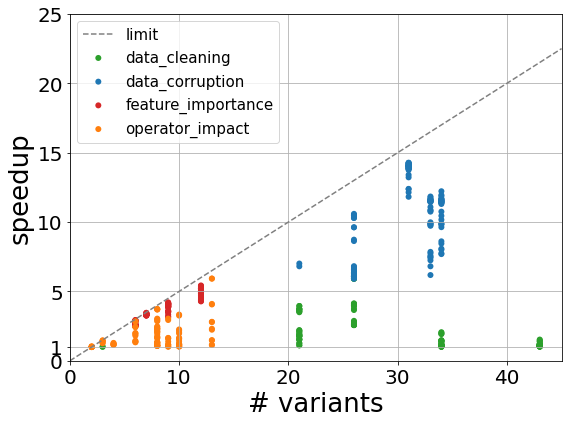

In [7]:
speedup_scatter_plot(median_results, 'speedups_per_scenario', 'variant_count_including_orig', 'median_speedup', 'scenario')

[ 0.  5. 10. 15. 20. 25.]


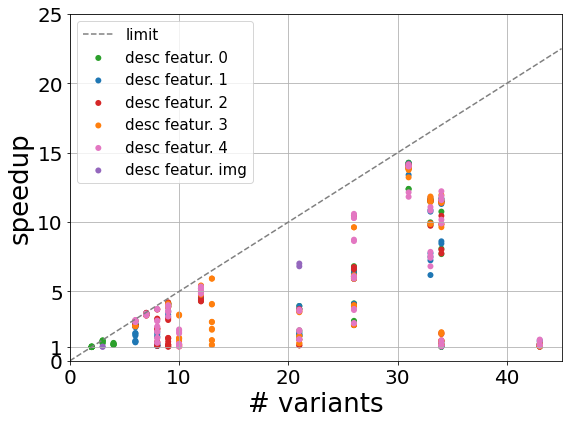

In [8]:
color_map = {
    'featurization_0': 'desc featur. 0',
    'featurization_1': 'desc featur. 1',
    'featurization_2': 'desc featur. 2',
    'featurization_3': 'desc featur. 3',
    'featurization_4': 'desc featur. 4',
    'image': 'desc featur. img'
}
pretty_featurization_desc = median_results.copy(deep=True)
pretty_featurization_desc['featurization'] = pretty_featurization_desc['featurization'].map(color_map)
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_featurization', 'variant_count_including_orig', 'median_speedup', 'featurization')

[ 0.  5. 10. 15. 20. 25.]


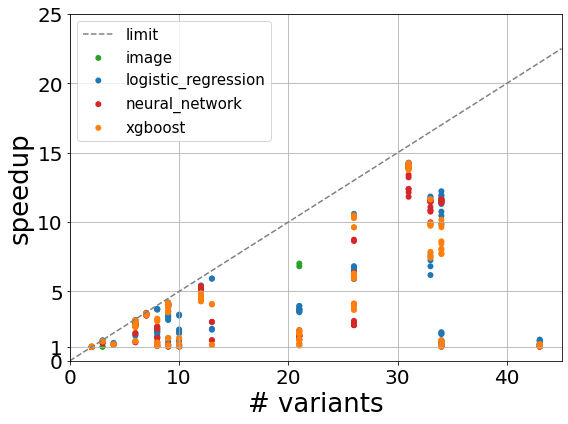

In [9]:
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_model', 'variant_count_including_orig', 'median_speedup', 'model')

[ 0.  5. 10. 15. 20. 25.]


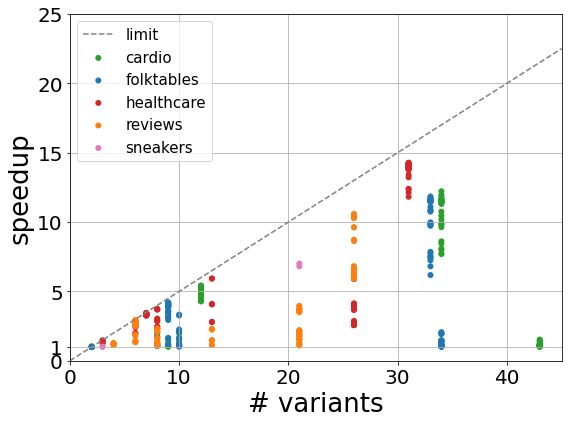

In [10]:
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_dataset', 'variant_count_including_orig', 'median_speedup', 'dataset')

[ 0.  5. 10. 15. 20. 25.]


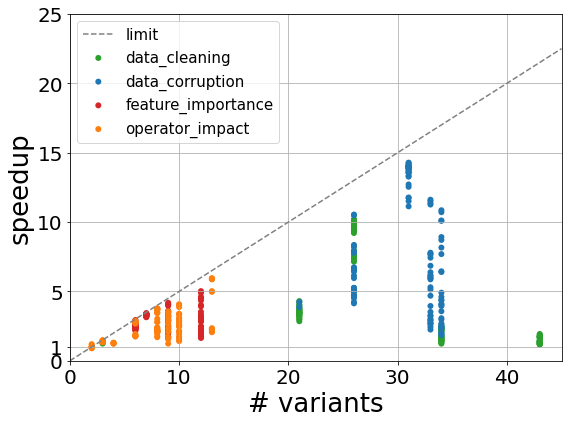

In [11]:
speedup_scatter_plot(median_results, 'speedups_per_scenario_excluding_model_training', 'variant_count_including_orig', 'median_speedup_excluding_model_training', 'scenario')

[ 0.  5. 10. 15. 20. 25.]


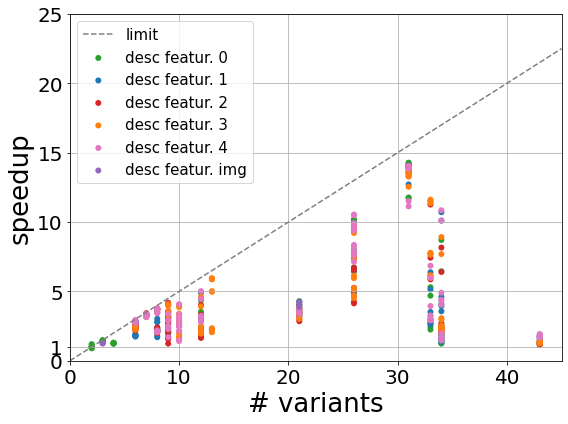

In [12]:
color_map = {
    'featurization_0': 'desc featur. 0',
    'featurization_1': 'desc featur. 1',
    'featurization_2': 'desc featur. 2',
    'featurization_3': 'desc featur. 3',
    'featurization_4': 'desc featur. 4',
    'image': 'desc featur. img'
}
pretty_featurization_desc = median_results.copy(deep=True)
pretty_featurization_desc['featurization'] = pretty_featurization_desc['featurization'].map(color_map)
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_featurization_excluding_model_training', 'variant_count_including_orig', 'median_speedup_excluding_model_training', 'featurization')


[ 0.  5. 10. 15. 20. 25.]


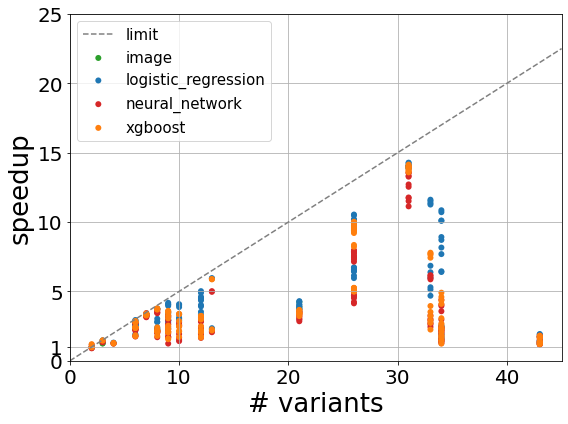

In [13]:
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_model_excluding_model_training', 'variant_count_including_orig', 'median_speedup_excluding_model_training', 'model')

[ 0.  5. 10. 15. 20. 25.]


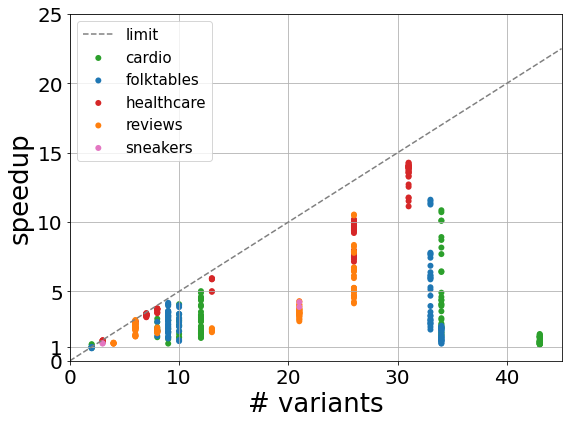

In [14]:
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_dataset_excluding_model_training', 'variant_count_including_orig', 'median_speedup_excluding_model_training', 'dataset')


In [26]:
def speedup_box_plot(data, title, with_outliers, group_col_1, group_col_2, plot_column, absolute_times):
    fig, ax = plt.subplots()

    classes_col1 = list(data[group_col_1].unique())
    classes_col2 = list(data[group_col_2].unique())

    if absolute_times is False:
        colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:pink', 'tab:purple']
    else:
        colors = ['tab:green', 'tab:green', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red', 'tab:orange', 'tab:orange']
    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)


    position = 1
    for group1_index, group1_val in enumerate(classes_col1):
        filtered1_data = data[data[group_col_1] == group1_val]

        for group2_index, (group2_val, color) in enumerate(zip(classes_col2, colors)):
            filtered2_data = filtered1_data[filtered1_data[group_col_2] == group2_val]
            values_to_plot = filtered2_data[plot_column]
            if absolute_times is False:
                box = plt.boxplot([values_to_plot], positions=[position], widths=0.6, showfliers=with_outliers)
                set_box_color(box, color)
            else:
                patch_artist = group2_index % 2 == 1
                box = plt.boxplot([values_to_plot], positions=[position], widths=0.6, showfliers=with_outliers, patch_artist=patch_artist)
                set_box_color(box, color)
                if patch_artist:
                    plt.setp(box['medians'], color='black')
            position += 1
        position += 1
    # ax.legend(fontsize=15, ncol=1)
    # ax.grid(True)
    plt.gca().yaxis.grid(True, linestyle='-.')
    if absolute_times is True:
        plt.ylabel('runtime [s]', fontsize=26)
        plt.ylim(0, None)
    else:
        plt.ylabel('speedup', fontsize=20)
        if with_outliers is False:
            plt.ylim(0, None)
    # plt.xlabel('# rows', fontsize=26)
    # plt.xlim(0, 45)
    ax.set_xticks([len(classes_col2) / 2 + (len(classes_col2) + 1) * group1_index for group1_index, _ in enumerate(classes_col1)])
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xticklabels(classes_col1, fontsize=18)

    for class2, color in zip(classes_col2, colors):
        plt.plot([], c=color, label=class2)
    plt.legend(fontsize=15)

    plt.gcf().set_size_inches(8, 6)
    plt.tight_layout()

    current_directory = os.getcwd()
    output_directory = os.path.join(current_directory, r'figures')
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    plt.gcf().savefig(f'./figures/{title}.pdf', dpi=300)
    plt.show()

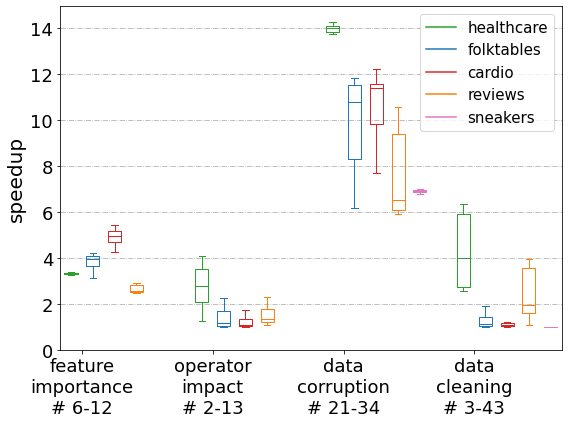

In [16]:
# Without outliers
scenario_names = {
    'feature_importance': 'feature\nimportance',
    'operator_impact': 'operator\nimpact',
    'data_cleaning': 'data\ncleaning',
    'data_corruption': 'data\ncorruption',
}
for scenario_key, scenario_value in list(scenario_names.items()):
    min_variants = min(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    max_variants = max(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    scenario_names[scenario_key] = scenario_value + f"\n# {min_variants}-{max_variants}"
pretty_scenario_names = median_results.copy(deep=True)
pretty_scenario_names['scenario'] = pretty_scenario_names['scenario'].map(scenario_names)
speedup_box_plot(pretty_scenario_names, 'speedup_per_scenario_per_dataset_without_outliers', False, 'scenario', 'dataset', 'median_speedup', False)

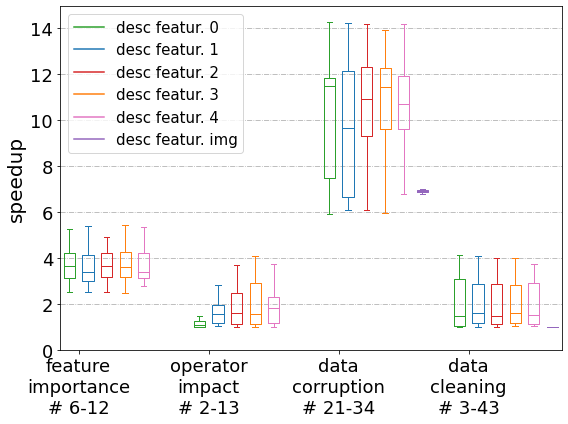

In [17]:
scenario_names = {
    'feature_importance': 'feature\nimportance',
    'operator_impact': 'operator\nimpact',
    'data_cleaning': 'data\ncleaning',
    'data_corruption': 'data\ncorruption',
}
for scenario_key, scenario_value in list(scenario_names.items()):
    min_variants = min(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    max_variants = max(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    scenario_names[scenario_key] = scenario_value + f"\n# {min_variants}-{max_variants}"
featurization_map = {
    'featurization_0': 'desc featur. 0',
    'featurization_1': 'desc featur. 1',
    'featurization_2': 'desc featur. 2',
    'featurization_3': 'desc featur. 3',
    'featurization_4': 'desc featur. 4',
    'image': 'desc featur. img'
}
pretty_scenario_names = median_results.copy(deep=True)
pretty_scenario_names['scenario'] = pretty_scenario_names['scenario'].map(scenario_names)
pretty_scenario_names['featurization'] = pretty_scenario_names['featurization'].map(featurization_map)
speedup_box_plot(pretty_scenario_names, 'speedup_per_scenario_per_featurization_without_outliers', False, 'scenario', 'featurization', 'median_speedup', False)

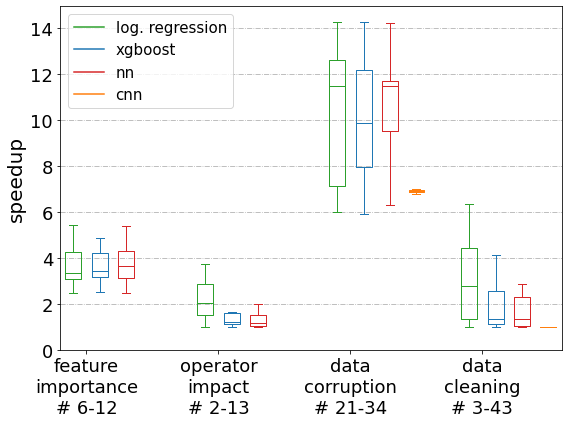

In [18]:
scenario_names = {
    'feature_importance': 'feature\nimportance',
    'operator_impact': 'operator\nimpact',
    'data_cleaning': 'data\ncleaning',
    'data_corruption': 'data\ncorruption',
}
for scenario_key, scenario_value in list(scenario_names.items()):
    min_variants = min(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    max_variants = max(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    scenario_names[scenario_key] = scenario_value + f"\n# {min_variants}-{max_variants}"
model_map = {
    'logistic_regression': 'log. regression',
    'xgboost': 'xgboost',
    'neural_network': 'nn',
    'image': 'cnn',
}
pretty_scenario_names = median_results.copy(deep=True)
pretty_scenario_names['scenario'] = pretty_scenario_names['scenario'].map(scenario_names)
pretty_scenario_names['model'] = pretty_scenario_names['model'].map(model_map)
speedup_box_plot(pretty_scenario_names, 'speedup_per_scenario_per_model_without_outliers', False, 'scenario', 'model', 'median_speedup', False)

/Users/stefanuva/Documents/mlwhatif/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/stefanuva/Documents/mlwhatif/venv/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


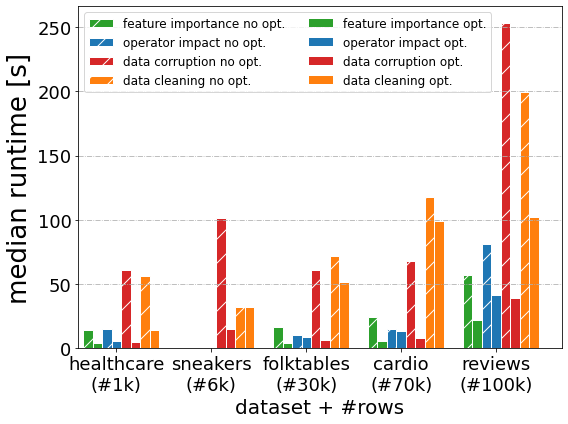

In [19]:
def speedup_bar_plot(data, title, with_outliers, group_col_1, group_col_2, plot_column, absolute_times):
    fig, ax = plt.subplots()
    # ax.set_yscale('log')

    classes_col1 = list(data[group_col_1].unique())
    classes_col2 = list(data[group_col_2].unique())

    if absolute_times is False:
        colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:pink', 'tab:purple']
    else:
        colors = ['tab:green', 'tab:green', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red', 'tab:orange', 'tab:orange']

    position = 1
    for group1_index, group1_val in enumerate(classes_col1):
        filtered1_data = data[data[group_col_1] == group1_val]

        for group2_index, (group2_val, color) in enumerate(zip(classes_col2, colors)):
            filtered2_data = filtered1_data[filtered1_data[group_col_2] == group2_val]
            values_to_plot = filtered2_data[plot_column]
            if (group2_index % 2) == 0:
                hatch = "/"
            else:
                hatch = None
            box = plt.bar([position], np.median([values_to_plot]), width=1., color=color, hatch=hatch, edgecolor='white')
            position += 1
        position += 2
    # ax.legend(fontsize=15, ncol=1)
    # ax.grid(True)
    plt.gca().yaxis.grid(True, linestyle='-.')
    if absolute_times is True:
        plt.ylabel('median runtime [s]', fontsize=26)
        plt.ylim(0, None)
    else:
        plt.ylabel('speedup', fontsize=20)
        if with_outliers is False:
            plt.ylim(0, None)
    # plt.xlabel('# rows', fontsize=26)
    plt.xlabel('dataset + #rows', fontsize=20)
    plt.xlim(0, None)
    ax.set_xticks([4 + (len(classes_col2) + 2) * group1_index for group1_index, _ in enumerate(classes_col1)])
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xticklabels(classes_col1, fontsize=18)

    handles1 = []
    handles2 = []
    # handles.append(patches.Patch( facecolor='grey',hatch="/",label='no opt.'))
    # handles.append(patches.Patch( facecolor='grey',hatch=None,label='opt.'))
    for class_index, (class2, color) in enumerate(zip(classes_col2, colors)):
        # class2_name = class2.replace(" no opt.", "")
        if (class_index % 2) == 0:
            handles1.append(patches.Patch(facecolor=color,edgecolor='white', hatch="/",label=class2))
        else:
            handles2.append(patches.Patch(facecolor=color,hatch=None,label=class2))

        # patches.Patch( facecolor='grey',hatch="/",label='no. opt')
        # line = plt.plot([], c=color, label=class2_name)[0]
        # handles.append(line)
    plt.legend(fontsize=12, handles=handles1 + handles2, loc="upper left", ncol=2)

    plt.gcf().set_size_inches(8, 6)
    plt.tight_layout()

    current_directory = os.getcwd()
    output_directory = os.path.join(current_directory, r'figures')
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    plt.gcf().savefig(f'./figures/{title}.pdf', dpi=300)
    plt.show()

scenario_names = {
    'feature_importance': 'feature importance',
    'operator_impact': 'operator impact',
    'data_cleaning': 'data cleaning',
    'data_corruption': 'data corruption',
}
model_map = {
    'logistic_regression': 'log. regression',
    'xgboost': 'xgboost',
    'neural_network': 'nn',
    'image': 'cnn',
}
pretty_scenario_names = median_results.copy(deep=True)
pretty_scenario_names['scenario'] = pretty_scenario_names['scenario'].map(scenario_names)
pretty_scenario_names['model'] = pretty_scenario_names['model'].map(model_map)
pretty_scenario_names['run'] = pretty_scenario_names['model'].map(model_map)

with_opt = pretty_scenario_names.copy()
with_opt['runtime'] = with_opt['median_opt'] / 1000
with_opt['scenario'] = with_opt['scenario'] + " opt."

no_opt = pretty_scenario_names.copy()
no_opt['runtime'] = no_opt['median_no_opt'] / 1000
no_opt['scenario'] = no_opt['scenario'] + " no opt."

data_set_sort_order = {
    'healthcare': 0,
    'sneakers': 1,
    'folktables': 2,
    'cardio': 3,
    'reviews': 4,
}
scenario_sort_order = {
    'feature importance no opt.': 0,
    'feature importance opt.': 1,
    'operator impact no opt.': 2,
    'operator impact opt.': 3,
    'data corruption no opt.': 4,
    'data corruption opt.': 5,
    'data cleaning no opt.': 6,
    'data cleaning opt.': 7
}
data_set_row_count_map = {
    'healthcare': 'healthcare\n(#1k)',
    'sneakers': 'sneakers\n(#6k)',
    'folktables': 'folktables\n(#30k)',
    'cardio': 'cardio\n(#70k)',
    'reviews': 'reviews\n(#100k)',
}
opt_and_no_opt = pd.concat([with_opt, no_opt], axis=0)
opt_and_no_opt["dataset_sort_order"] = opt_and_no_opt["dataset"].map(data_set_sort_order)
opt_and_no_opt["scenario_sort_order"] = opt_and_no_opt["scenario"].map(scenario_sort_order)
opt_and_no_opt = opt_and_no_opt.sort_values(["dataset_sort_order", "scenario_sort_order"])
opt_and_no_opt['dataset'] = opt_and_no_opt['dataset'].map(data_set_row_count_map)
speedup_bar_plot(opt_and_no_opt, 'runtime_w_and_wo_per_dataset_per_scenario_without_outliers', False, 'dataset', 'scenario', 'runtime', True)

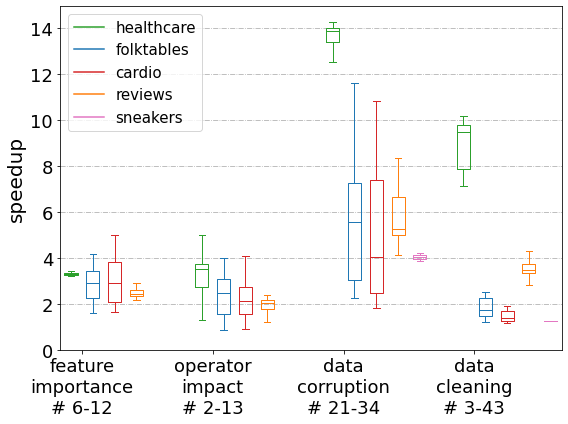

In [20]:
# Without outliers
scenario_names = {
    'feature_importance': 'feature\nimportance',
    'operator_impact': 'operator\nimpact',
    'data_cleaning': 'data\ncleaning',
    'data_corruption': 'data\ncorruption',
}
for scenario_key, scenario_value in list(scenario_names.items()):
    min_variants = min(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    max_variants = max(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    scenario_names[scenario_key] = scenario_value + f"\n# {min_variants}-{max_variants}"
pretty_scenario_names = median_results.copy(deep=True)
pretty_scenario_names['scenario'] = pretty_scenario_names['scenario'].map(scenario_names)
speedup_box_plot(pretty_scenario_names, 'speedup_wo_training_per_scenario_per_dataset_without_outliers', False, 'scenario', 'dataset', 'median_speedup_excluding_model_training', False)


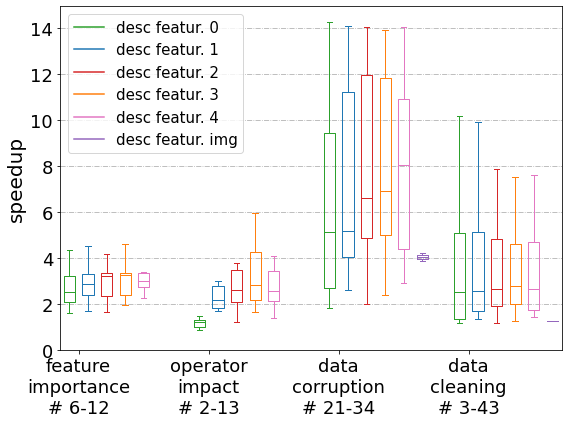

In [21]:
scenario_names = {
    'feature_importance': 'feature\nimportance',
    'operator_impact': 'operator\nimpact',
    'data_cleaning': 'data\ncleaning',
    'data_corruption': 'data\ncorruption',
}
for scenario_key, scenario_value in list(scenario_names.items()):
    min_variants = min(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    max_variants = max(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    scenario_names[scenario_key] = scenario_value + f"\n# {min_variants}-{max_variants}"
featurization_map = {
    'featurization_0': 'desc featur. 0',
    'featurization_1': 'desc featur. 1',
    'featurization_2': 'desc featur. 2',
    'featurization_3': 'desc featur. 3',
    'featurization_4': 'desc featur. 4',
    'image': 'desc featur. img'
}
pretty_scenario_names = median_results.copy(deep=True)
pretty_scenario_names['scenario'] = pretty_scenario_names['scenario'].map(scenario_names)
pretty_scenario_names['featurization'] = pretty_scenario_names['featurization'].map(featurization_map)
speedup_box_plot(pretty_scenario_names, 'speedup_wo_training_per_scenario_per_featurization_without_outliers', False, 'scenario', 'featurization', 'median_speedup_excluding_model_training', False)

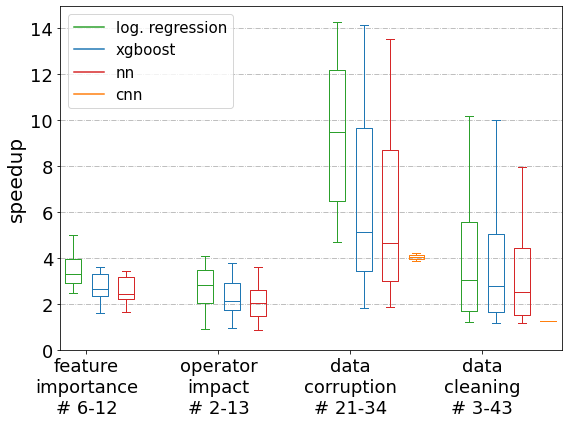

In [22]:
# FIXME: Is w/o training bugged?
scenario_names = {
    'feature_importance': 'feature\nimportance',
    'operator_impact': 'operator\nimpact',
    'data_cleaning': 'data\ncleaning',
    'data_corruption': 'data\ncorruption',
}
for scenario_key, scenario_value in list(scenario_names.items()):
    min_variants = min(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    max_variants = max(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    scenario_names[scenario_key] = scenario_value + f"\n# {min_variants}-{max_variants}"
model_map = {
    'logistic_regression': 'log. regression',
    'xgboost': 'xgboost',
    'neural_network': 'nn',
    'image': 'cnn',
}
pretty_scenario_names = median_results.copy(deep=True)
pretty_scenario_names['scenario'] = pretty_scenario_names['scenario'].map(scenario_names)
pretty_scenario_names['model'] = pretty_scenario_names['model'].map(model_map)
speedup_box_plot(pretty_scenario_names, 'speedup_wo_training_per_scenario_per_model_without_outliers', False, 'scenario', 'model', 'median_speedup_excluding_model_training', False)

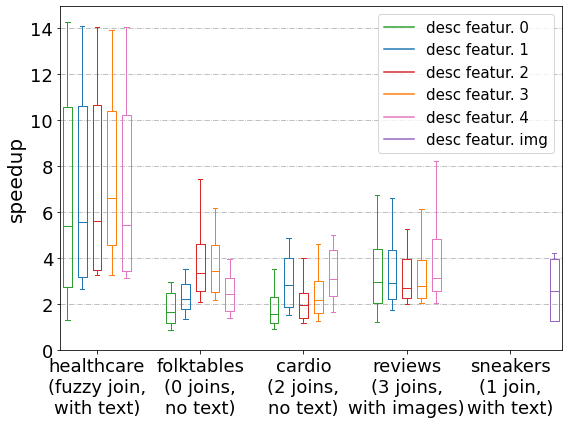

In [30]:
data_set_join_info_map = {
    'healthcare': 'healthcare\n(fuzzy join,\nwith text)',
    'sneakers': 'sneakers\n(1 join,\nwith images)',
    'folktables': 'folktables\n(0 joins,\nno text)',
    'cardio': 'cardio\n(2 joins,\nno text)',
    'reviews': 'reviews\n(3 joins,\nwith text)',
}
for scenario_key, scenario_value in list(scenario_names.items()):
    min_variants = min(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    max_variants = max(median_results[median_results['scenario'] == scenario_key]['variant_count_including_orig'])
    scenario_names[scenario_key] = scenario_value + f"\n# {min_variants}-{max_variants}"
featurization_map = {
    'featurization_0': 'desc featur. 0',
    'featurization_1': 'desc featur. 1',
    'featurization_2': 'desc featur. 2',
    'featurization_3': 'desc featur. 3',
    'featurization_4': 'desc featur. 4',
    'image': 'desc featur. img'
}
pretty_scenario_names = median_results.copy(deep=True)
pretty_scenario_names['scenario'] = pretty_scenario_names['scenario'].map(scenario_names)
pretty_scenario_names['dataset'] = pretty_scenario_names['dataset'].map(data_set_join_info_map)
pretty_scenario_names['featurization'] = pretty_scenario_names['featurization'].map(featurization_map)
speedup_box_plot(pretty_scenario_names, 'speedup_wo_training_per_dataset_per_featurization_without_outliers', False, 'dataset', 'featurization', 'median_speedup_excluding_model_training', False)
